In [1]:
import numpy as np # NumPy
import pandas as pd # Pandas

# IPython( jupyter notebook ) 디스플레이 설정 변경
# 출력할 열의 개수 한도 설정
pd.set_option( 'display.max_columns', 20 )
# 출력할 열의 너비 설정
pd.set_option( 'display.max_colwidth', 20 )
# 유니코드 사용 너비 조정
pd.set_option( 'display.unicode.east_asian_width', True )

# 경고( warnings ) 메시지 출력 방지
import warnings
warnings.filterwarnings( 'ignore' )

## 데이터 표준화

### 단위 표준화

In [4]:
df = pd.read_csv('./data/auto-mpg.csv', header = None)
df.columns = ['mpg','cylinders','displacement','horsepower',
             'weight','accelaration','model year','origin',
             'name']
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


### 데이터 프레임을 CSV 파일로 생성

In [5]:
df.to_csv('./data/auto-mpg-title.csv')

### 인덱스를 저장하지 않으려면

In [6]:
df.to_csv('./data/auto-mpg-title.csv', index = False)

###   우리가 쓰지 않는 단위를 변경해야한다!
### mpg = miles per gallon, 1갤런당 이동한 거리
### kpl = kilometers per liter, 1리터당 이동한 거리 

In [7]:
mpg_to_kpl = 1.60934 / 3.7541

df['kpl'] = df['mpg'] * mpg_to_kpl

df.head(10).round(2)

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...,7.72
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.43
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.72
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.86
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.29
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,6.43
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,6.00
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,6.00
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,6.00
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,6.43


### 자료형 변환

### 연속형 자료 : 연속적으로 변하는 값(자료형  - 숫자형) = 그룹 불가
### 예) 키, 몸무게, 연비, 마력 등

###  범주형 (categorical, 이산형) 자료 : 수치 형태지만 연속적 변화가 아닌 그룹화 성격을 갖는 값을 표현하는 자료형 - 숫자, 문자
### 예) 성별, 국가, 학년 등

###  시계열(timestamp)  자료 : 시간 정보( 순차 형태 )를 표현하는 자료형
### 예) 주식 관련 데이터셋( 날짜, 시간 )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   accelaration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


In [10]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
accelaration    float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object

In [11]:
df.describe()

,mpg,cylinders,displacement,weight,accelaration,model year,origin,kpl
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,10.080430
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,3.350624
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,3.858198
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,7.502051
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,9.859839
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,12.431970
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,19.976890


In [13]:
df['horsepower'].unique()
# '?' 는 결측치가 아니다.
# 숫자로 인식되야할 데이터가 물음표로 인해 전체가 문자로 인식된다.

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [15]:
# '?' 를 NaN으로 변경
df['horsepower'].replace('?', np.nan, inplace = True)
# NaN 포함 데이터 삭제
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)

# horsepower 변수를 
df['horsepower'] = df['horsepower'].astype('float')
df['horsepower'].dtypes

dtype('float64')

In [16]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,kpl
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,10.050999
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,3.345918
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,3.858198
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,7.287707
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,9.752666
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,12.431970
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,19.976890


### 자료형 변환 - 범주형으로 변환

In [17]:
df['origin'].dtypes

dtype('int64')

In [18]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [19]:
df['origin'].replace({1:'USA',2:'EU',3:'JPN'},
                    inplace = True)
df['origin'].dtypes

dtype('O')

In [20]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,kpl
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,10.050999
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.345918
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,3.858198
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,7.287707
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,9.752666
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,12.431970
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,19.976890


In [21]:
df['origin'].unique()

array(['USA', 'JPN', 'EU'], dtype=object)

In [22]:
df['origin'] = df['origin'].astype('category')
df['origin'].dtypes

CategoricalDtype(categories=['EU', 'JPN', 'USA'], ordered=False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   accelaration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   kpl           392 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 31.1+ KB


In [24]:
df['model year'].dtypes

dtype('int64')

In [25]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [26]:
df['model year'] = df['model year'].astype('category')
df['model year'].dtypes

CategoricalDtype(categories=[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], ordered=False)

In [27]:
df['cylinders'].dtypes

dtype('int64')

In [28]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [29]:
df['cylinders'] = df['cylinders'].astype('category')
df['cylinders'].dtypes

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   accelaration  392 non-null    float64 
 6   model year    392 non-null    category
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   kpl           392 non-null    float64 
dtypes: category(3), float64(6), object(1)
memory usage: 26.7+ KB


In [31]:
df.describe()

,mpg,displacement,horsepower,weight,accelaration,kpl
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,10.050999
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.345918
min,9.000000,68.000000,46.000000,1613.000000,8.000000,3.858198
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,7.287707
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,9.752666
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,12.431970
max,46.600000,455.000000,230.000000,5140.000000,24.800000,19.976890


###  구간 분할

In [33]:
df['origin'].value_counts()

USA    245
JPN     79
EU      68
Name: origin, dtype: int64

In [35]:
df['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
30.7     1
31.9     1
44.0     1
28.8     1
27.4     1
Name: mpg, Length: 127, dtype: int64

In [38]:
# numpy.histogram() 함수로 3개의 구간(bin)으로 나누는 경계값 리스트 생성
count, bin_dividers = np.histogram(df['horsepower'], bins = 3)
print(count, '\n', bin_dividers)

[257 103  32] 
 [ 46.         107.33333333 168.66666667 230.        ]


In [41]:
#pd.cut() 함수를 이용하여 구간에 따른 범주형 값을 갖는 변수 추가
bin_names = ['저출력','보통출력','고출력']

# pd.cut() 함수 인수
# x = df['horsepower'] : 데이터 배열
# bins = bin_dividers  : 구간 경계값 리스트
# labels = bin_names   : bin 이름
# include_lowest = True : 첫 경계값 포함 유무
df['hp_bin'] = pd.cut(x = df['horsepower'],
                     bins = bin_dividers,
                     labels = bin_names,
                     include_lowest =True)
df[['horsepower','hp_bin']].head(10)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [43]:
df.info()  # hp_bin - category로 부여

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   accelaration  392 non-null    float64 
 6   model year    392 non-null    category
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   kpl           392 non-null    float64 
 10  hp_bin        392 non-null    category
dtypes: category(4), float64(6), object(1)
memory usage: 27.2+ KB


## 원-핫 인코딩(One-Hot encoding)

In [44]:
horsepower_dummies = pd.get_dummies(df['hp_bin'])
horsepower_dummies.head(10)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


### 시계열(Timestamp) 자료형

In [45]:
df = pd.read_csv('./data/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


### 문자열 데이터를 시계열 데이터로 변경

In [47]:
df['new_date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close,Start,High,Low,Volume,new_date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [49]:
type(df['new_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
df.set_index('new_date',inplace = True)
df.drop('Date', axis = 1, inplace = True)
df.head()

,Close,Start,High,Low,Volume
new_date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes


### Period 데이터 변환 : pandas.to_period() 함수

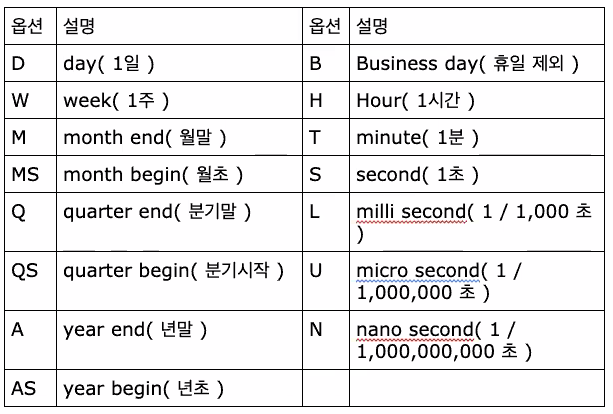

In [52]:
dates = ['2021-03-01', '2021-04-01', '2021-05-01']

to_dates = pd.to_datetime(dates)
to_dates

DatetimeIndex(['2021-03-01', '2021-04-01', '2021-05-01'], dtype='datetime64[ns]', freq=None)

In [53]:
# Timestamp를 년월일 형태의 period로 변환
pr_day = to_dates.to_period(freq = 'D')
pr_day

PeriodIndex(['2021-03-01', '2021-04-01', '2021-05-01'], dtype='period[D]', freq='D')

In [55]:
# Timestamp를 년월 형태의 period로 변환
pr_month = to_dates.to_period(freq = 'M')
pr_month

PeriodIndex(['2021-03', '2021-04', '2021-05'], dtype='period[M]', freq='M')

In [57]:
# Timestamp를 년 형태의 period로 변환
pr_year = to_dates.to_period(freq = 'A')
pr_year

PeriodIndex(['2021', '2021', '2021'], dtype='period[A-DEC]', freq='A-DEC')

### Timestamp 배열 - pandas.date_range() 함수

In [58]:
# Timestamp 배열 생성 - 월 간격, 월 시작일 기준

# start : 날짜 범위 시작일
# end   : 날짜 범위 끝
# periods : 생성할  Timestamp 개수
# freq : 시간 간격
# tz : 시간대(timezone)

ts_ms = pd.date_range(start = '2021-01-01',
                     end = None,
                     periods = 6,
                     freq = 'MS',
                     tz = 'Asia/Seoul')
ts_ms

DatetimeIndex(['2021-01-01 00:00:00+09:00', '2021-02-01 00:00:00+09:00',
               '2021-03-01 00:00:00+09:00', '2021-04-01 00:00:00+09:00',
               '2021-05-01 00:00:00+09:00', '2021-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [59]:
# Timestamp 배열 생성 - 월말
ts_ms = pd.date_range(start = '2021-01-01',
                      periods = 4,
                      freq = 'M',
                      tz = 'Asia/Seoul')
ts_ms

DatetimeIndex(['2021-01-31 00:00:00+09:00', '2021-02-28 00:00:00+09:00',
               '2021-03-31 00:00:00+09:00', '2021-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')

In [60]:
# Timestamp 배열 생성 - 분기(3개월)
ts_ms = pd.date_range(start = '2021-01-01',
                      periods = 4,
                      freq = '31M',
                      tz = 'Asia/Seoul')
ts_ms

DatetimeIndex(['2021-01-31 00:00:00+09:00', '2023-08-31 00:00:00+09:00',
               '2026-03-31 00:00:00+09:00', '2028-10-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='31M')

### Period 배열 - pandas.period_range() 함수

In [61]:
# Period 배열 생성 - 1개월 단위

# start   : 날짜 범위 시작
# end     : 날짜 범위 끝
# periods : 생성할 period 개수
# freq    : 시간 간격
pr_m = pd.period_range(start = '2021-01-01',
                     end = None,
                     periods = 4,
                     freq = 'M')
pr_m

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04'], dtype='period[M]', freq='M')

In [62]:
# period 배열 생성 - 1시간 길이
pr_m = pd.period_range(start = '2021-01-01',
                     end = None,
                     periods = 4,
                     freq = 'H')
pr_m

PeriodIndex(['2021-01-01 00:00', '2021-01-01 01:00', '2021-01-01 02:00',
             '2021-01-01 03:00'],
            dtype='period[H]', freq='H')

## 시계열 데이터 
### 날짜 데이터 분리

In [63]:
df = df.reset_index()
df.head()

,new_date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [64]:
# Timestamp 변수 내용을 년/월/일로 분리
df['Year'] = df['new_date'].dt.year  # 년 분리
df['Month'] = df['new_date'].dt.month  # 월 분리
df['Day'] = df['new_date'].dt.day  # 일 분리

df.head()

,new_date,Close,Start,High,Low,Volume,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26


In [65]:
# str 형태의 날짜 데이터를 년/월/일 분리
string = '2021-05-27'
d_string = string.split('-')
print(d_string)
print()
print(d_string[0],d_string[1],d_string[2], sep='\t')

['2021', '05', '27']

2021	05	27


In [66]:
df['Date_yr'] = df['new_date'].dt.to_period(freq = 'A')
df['Date_m'] = df['new_date'].dt.to_period(freq = 'M')

df.head()

,new_date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2,2018,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29,2018,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28,2018,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26,2018,2018-06


In [67]:
df.set_index('Date_m', inplace = True)
df.head()

,new_date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
Date_m,,,,,,,,,,
2018-07,2018-07-02,10100,10850,10900,10000,137977,2018,7,2,2018
2018-06,2018-06-29,10700,10550,10900,9990,170253,2018,6,29,2018
2018-06,2018-06-28,10400,10900,10950,10150,155769,2018,6,28,2018
2018-06,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018
2018-06,2018-06-26,10800,10900,11000,10700,63039,2018,6,26,2018


In [68]:
df = df.reset_index()
df.head()

,Date_m,new_date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
0,2018-07,2018-07-02,10100,10850,10900,10000,137977,2018,7,2,2018
1,2018-06,2018-06-29,10700,10550,10900,9990,170253,2018,6,29,2018
2,2018-06,2018-06-28,10400,10900,10950,10150,155769,2018,6,28,2018
3,2018-06,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018
4,2018-06,2018-06-26,10800,10900,11000,10700,63039,2018,6,26,2018


In [69]:
df.set_index('new_date',inplace = True)
df.head()

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_date,,,,,,,,,,
2018-07-02,2018-07,10100,10850,10900,10000,137977,2018,7,2,2018
2018-06-29,2018-06,10700,10550,10900,9990,170253,2018,6,29,2018
2018-06-28,2018-06,10400,10900,10950,10150,155769,2018,6,28,2018
2018-06-27,2018-06,10900,10800,11050,10500,133548,2018,6,27,2018
2018-06-26,2018-06,10800,10900,11000,10700,63039,2018,6,26,2018


In [70]:
df.index

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_date', freq=None)

### 날짜 인덱스를 이용한 데이터 선택

In [71]:
df_y = df.loc['2018']
df_y.head()

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_date,,,,,,,,,,
2018-07-02,2018-07,10100,10850,10900,10000,137977,2018,7,2,2018
2018-06-29,2018-06,10700,10550,10900,9990,170253,2018,6,29,2018
2018-06-28,2018-06,10400,10900,10950,10150,155769,2018,6,28,2018
2018-06-27,2018-06,10900,10800,11050,10500,133548,2018,6,27,2018
2018-06-26,2018-06,10800,10900,11000,10700,63039,2018,6,26,2018


In [72]:
df_m = df.loc['2018-06']
df_m.head()

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_date,,,,,,,,,,
2018-06-29,2018-06,10700,10550,10900,9990,170253,2018,6,29,2018
2018-06-28,2018-06,10400,10900,10950,10150,155769,2018,6,28,2018
2018-06-27,2018-06,10900,10800,11050,10500,133548,2018,6,27,2018
2018-06-26,2018-06,10800,10900,11000,10700,63039,2018,6,26,2018
2018-06-25,2018-06,11150,11400,11450,11000,55519,2018,6,25,2018


In [73]:
df_d = df.loc['2018-07-02']
df_d

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_date,,,,,,,,,,
2018-07-02,2018-07,10100,10850,10900,10000,137977,2018,7,2,2018


In [74]:
df_d = df.loc['2018-06-01']
df_d

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_date,,,,,,,,,,
2018-06-01,2018-06,11900,11800,12100,11750,32062,2018,6,1,2018


In [75]:
df_d = df.loc['2018-06-25':'2018-06-20']
df_d

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
new_date,,,,,,,,,,
2018-06-25,2018-06,11150,11400,11450,11000,55519,2018,6,25,2018
2018-06-22,2018-06,11300,11250,11450,10750,134805,2018,6,22,2018
2018-06-21,2018-06,11200,11350,11750,11200,133002,2018,6,21,2018
2018-06-20,2018-06,11550,11200,11600,10900,308596,2018,6,20,2018


### Timestamp 타입에 대하여 두 날짜 사이의 간격 계산

In [76]:
today = pd.to_datetime('2021-12-25')
df['time_delta'] = today - df.index

df.head()

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,time_delta
new_date,,,,,,,,,,,
2018-07-02,2018-07,10100,10850,10900,10000,137977,2018,7,2,2018,1272 days
2018-06-29,2018-06,10700,10550,10900,9990,170253,2018,6,29,2018,1275 days
2018-06-28,2018-06,10400,10900,10950,10150,155769,2018,6,28,2018,1276 days
2018-06-27,2018-06,10900,10800,11050,10500,133548,2018,6,27,2018,1277 days
2018-06-26,2018-06,10800,10900,11000,10700,63039,2018,6,26,2018,1278 days


In [77]:
df.reset_index()
df.set_index('time_delta', inplace = True)
df.head()

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
time_delta,,,,,,,,,,
1272 days,2018-07,10100,10850,10900,10000,137977,2018,7,2,2018
1275 days,2018-06,10700,10550,10900,9990,170253,2018,6,29,2018
1276 days,2018-06,10400,10900,10950,10150,155769,2018,6,28,2018
1277 days,2018-06,10900,10800,11050,10500,133548,2018,6,27,2018
1278 days,2018-06,10800,10900,11000,10700,63039,2018,6,26,2018


In [78]:
df_delta = df['1272 days':'1277 days']
df_delta

,Date_m,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr
time_delta,,,,,,,,,,
1272 days,2018-07,10100,10850,10900,10000,137977,2018,7,2,2018
1275 days,2018-06,10700,10550,10900,9990,170253,2018,6,29,2018
1276 days,2018-06,10400,10900,10950,10150,155769,2018,6,28,2018
1277 days,2018-06,10900,10800,11050,10500,133548,2018,6,27,2018
